## Random forests

## Iris plants classification

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle = False)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# n_jobs=-1 : use all available CPU's
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(rnd_clf.score(X_test,y_test))

#print(accuracy_score(y_pred, y_test))


0.7333333333333333


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# n_jobs=-1 : use all available CPU's
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print(rnd_clf.score(X_test,y_test))

#print(accuracy_score(y_pred, y_test))


1.0


In [5]:
for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10908468719853878
sepal width (cm) 0.025774860208885676
petal length (cm) 0.4500187263026302
petal width (cm) 0.4151217262899453


<BarContainer object of 4 artists>

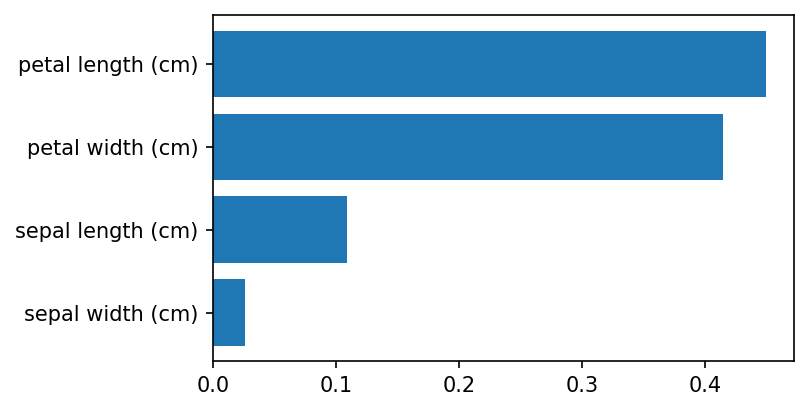

In [6]:
import matplotlib.pyplot as plt
import numpy as np


sorted_idx = rnd_clf.feature_importances_.argsort()
plt.figure(figsize=(5,3), dpi=150)
plt.barh(np.asarray(iris.feature_names)[sorted_idx],
         rnd_clf.feature_importances_[sorted_idx])


#sorted_idx = rnd_clf.feature_importances_.argsort()[::-1]
#plt.barh(np.asarray(iris.feature_names)[sorted_idx][::-1],
#         rnd_clf.feature_importances_[sorted_idx][::-1])

## California Housing Price prediction

In [ ]:
from sklearn.datasets import fetch_california_housing
cali_prices = fetch_california_housing()
X_reg = cali_prices.data
y_reg = cali_prices.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg,test_size = 0.01)
for_reg = RandomForestRegressor()
for_reg.fit(X_train, y_train)
y_pred_train = for_reg.predict(X_train)
y_pred_test = for_reg.predict(X_test)
print(mean_squared_error(y_pred_train, y_train))
print(mean_squared_error(y_pred_test, y_test))

0.034516099822009975
0.28385132709192795


## MNIST classification

In [7]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.

X_train = X_train.reshape(-1, 28*28)
X_test =  X_test.reshape(-1, 28*28)

#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test =  X_test.reshape(X_test.shape[0], -1)


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.score(X_test,y_test))
#print(accuracy_score(y_pred,y_test))

0.8276


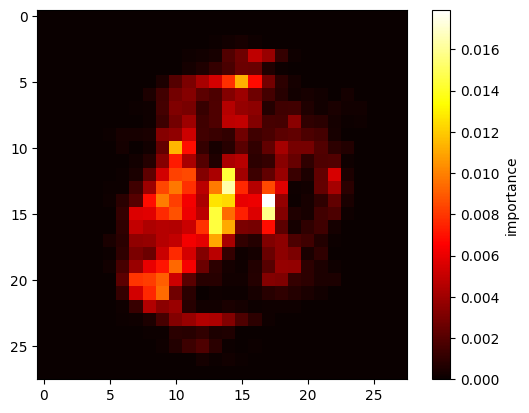

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rnd_clf.feature_importances_
feature_importances = feature_importances.reshape(28, 28)
plt.imshow(feature_importances, cmap='hot')
plt.colorbar(label='importance')
plt.show()

## Hyperparameter search: `GridSearchCV`

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Iris = load_iris()
X = Iris.data
y = Iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [3,10,100,500],
              'max_features': [0.25, 0.5, 0.75, 1]}

forest_clf = RandomForestClassifier(max_depth=2)
grid_search = GridSearchCV(forest_clf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=2),
             param_grid={'max_features': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [3, 10, 100, 500]},
             scoring='accuracy')

In [ ]:
print(grid_search.best_params_)

{'max_features': 0.5, 'n_estimators': 10}


In [ ]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=2, max_features=0.5, n_estimators=10)


In [ ]:
print(grid_search.best_score_)

0.9416666666666668


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.08245967 0.02319861 0.35705237 0.53728935]


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.best_estimator_.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


In [ ]:
print(grid_search.best_estimator_.score(X_test,y_test))

1.0


## Hyperparameter search: `RandomizedSearchCV`

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
Iris = load_iris()
X = Iris.data
y = Iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {'n_estimators': range(500),
                       'max_features': range(1, 5)}

forest_clf = RandomForestClassifier(max_depth=2)

randomized_search = RandomizedSearchCV(forest_clf,
                                       param_distributions,
                                       cv=4, n_iter = 50,
                                       scoring='accuracy')

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(max_depth=2),
                   n_iter=50,
                   param_distributions={'max_features': range(1, 5),
                                        'n_estimators': range(0, 500)},
                   scoring='accuracy')

In [ ]:
print(randomized_search.best_params_)

{'n_estimators': 26, 'max_features': 2}


In [ ]:
print(randomized_search.best_estimator_)

RandomForestClassifier(max_depth=2, max_features=2, n_estimators=26)


In [ ]:
print(randomized_search.best_score_)

0.95


In [ ]:
feature_importances = randomized_search.best_estimator_.feature_importances_
print(feature_importances)

[0.06217446 0.01534232 0.504752   0.41773121]


In [ ]:
y_pred = randomized_search.best_estimator_.predict(X_test)

print(accuracy_score(y_pred, y_test))

1.0


In [ ]:
print(randomized_search.best_estimator_.score(X_test,y_test))

1.0
